In [74]:
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.special import loggamma, gamma

In [46]:
def regret(x,y,timesteps):
    regret=(timesteps-np.trapz(y,x))/timesteps
    return regret


np.random.seed(3110) # set seed to replicate results

# parameters of our "hidden distribution" of prizes
n_levers = 10
mean = 0
std = 1
q_star = np.random.normal(loc = mean, scale = std, size = n_levers) # true value of the means 


# Greedy choice


In [3]:
def greedy_algorithm_with_first_push(Q,t):
    # try out all possibilities
    if t < len(Q):
        # action selection
        a_idx = t
    # if he has already ran once all the levers, just pick the best one
    else:
        a_idx = np.argmax(Q)
    # return the chosen lever
    return a_idx
def reward_generator(a_idx, q_star, std):
    # for a given choice, the bandit give back a reward extracted from a gaus distrib.
    R = np.random.normal(loc = q_star[a_idx],scale = std) # if size is not specified a scalar is returned
    return R

def update_Q(Q,N,a_idx,R):
    # update the estimate of Q according to what found
    Q[a_idx] = Q[a_idx] + (R - Q[a_idx]) / N[a_idx]
    return Q

def optimal_action_metric(actions, best_action):
    num = np.cumsum(actions == best_action) 
    den = np.arange(1,len(actions)+1,1)
    return num/den

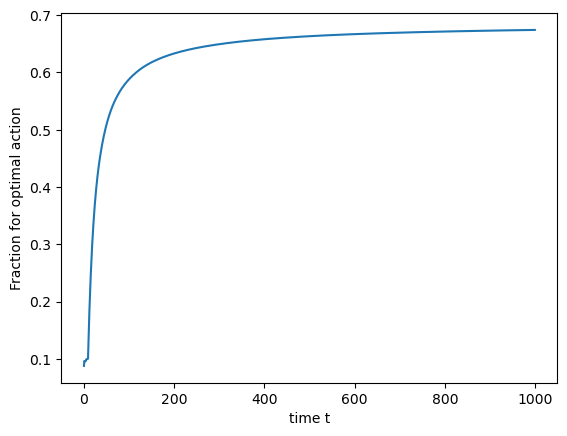

In [4]:
# initialization of Nruns
timesteps = 1000 # for how long the agent must play the bandit
metric_saver_fp = np.zeros(timesteps)
n_runs = 2000

for i in (range(n_runs)):
    # initialization of algorithm (re-extract the bandits every time)
    q_star = np.random.normal(loc = mean, scale = std, size = n_levers) # true value of the means 
    Q = np.zeros(n_levers)
    N = np.zeros(n_levers)
    
    best_action = np.argmax(q_star)
    actions = np.zeros(timesteps) # save the actions
    # loop
    for t in (range(timesteps)):
        a_idx = greedy_algorithm_with_first_push(Q,t)   # pick an action
        N[a_idx] += 1                                   # increase the counter for that action
        R = reward_generator(a_idx,q_star,std)          # generate the reward
        Q = update_Q(Q,N,a_idx,R)                       # update Q
        actions[t] = a_idx
    
    # convert actions array in cumulative times of best action taken
    metric = optimal_action_metric(actions,best_action)
    metric_saver_fp = metric_saver_fp + (metric - metric_saver_fp)/(i+1)
    
plt.plot(np.arange(0,timesteps,1),metric_saver_fp)
plt.xlabel('time t')
plt.ylabel('Fraction for optimal action')
plt.show()

    

# Silly Greedy

In [5]:
def silly_greedy_algorithm(Q,t):
    # find out the value of the max
    a_idx = np.argmax(Q)
    # check if there are more than one == to max
    n_max = np.where(Q == Q[a_idx])[0]
    # if there is only one, that's our man!
    if len(n_max == 1):
        return a_idx
    # if there are ties, we should pick one randomly
    else:
        a_idx = int(len(n_max) * np.random.uniform(0,1))
        return a_idx
    

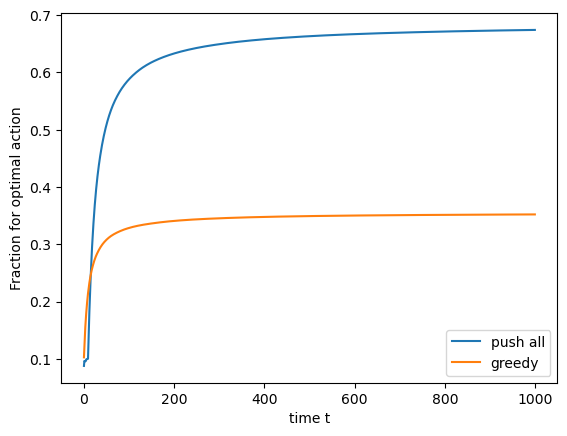

In [6]:
# initialization of Nruns
timesteps = 1000 # for how long the agent must play the bandit
metric_saver_g = np.zeros(timesteps)
n_runs = 2000

for i in (range(n_runs)):
    # initialization of algorithm (re-extract the bandits every time)
    q_star = np.random.normal(loc = mean, scale = std, size = n_levers) # true value of the means 
    Q = np.zeros(n_levers)
    N = np.zeros(n_levers)
    
    best_action = np.argmax(q_star)
    actions = np.zeros(timesteps) # save the actions
    # loop
    for t in (range(timesteps)):
        a_idx = silly_greedy_algorithm(Q,t)   # pick an action
        N[a_idx] += 1                                   # increase the counter for that action
        R = reward_generator(a_idx,q_star,std)          # generate the reward
        Q = update_Q(Q,N,a_idx,R)                       # update Q
        actions[t] = a_idx
    
    # convert actions array in cumulative times of best action taken
    metric = optimal_action_metric(actions,best_action)
    metric_saver_g = metric_saver_g + (metric - metric_saver_g)/(i+1)
    
plt.plot(np.arange(0,timesteps,1),metric_saver_fp, label = 'push all')
plt.plot(np.arange(0,timesteps,1),metric_saver_g, label = 'greedy')
plt.xlabel('time t')
plt.ylabel('Fraction for optimal action')
plt.legend()
plt.show()

    

# $\epsilon$ Greedy 

In [7]:
def epsilon_greedy_algorithm(Q,epsilon):
    # find out the value of the max
    a_idx = np.argmax(Q)
    # extract a number to decide what to do
    dec = np.random.uniform(0,1)
    
    # greedy choice
    if (dec > epsilon):
        # check if there are more than one == to max
        n_max = np.where(Q == Q[a_idx])[0]
        # if there is only one, that's our man!
        if len(n_max == 1):
            return a_idx
        # if there are ties, we should pick one randomly
        else:
            a_idx = int(len(n_max) * np.random.uniform(0,1))
            return a_idx
    # non-greedy choice
    else:
        # possible choices
        pos = np.arange(0,len(Q),1)
        pos = pos[pos != a_idx] # remove the argmax
        a_idx = pos[int(len(pos)*np.random.uniform(0,1))] # pick one random
        return a_idx
        
    

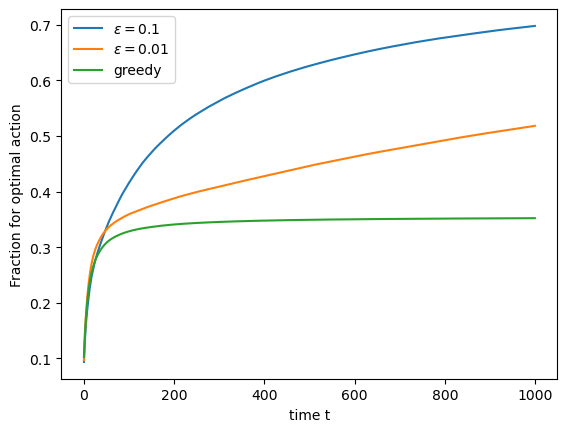

In [8]:
# initialization of Nruns
timesteps = 1000 # for how long the agent must play the bandit
n_runs = 2000
epsilons = [0.1,0.01]
metric_saver_eg_vector=[]

for epsilon in epsilons:
    metric_saver_eg = np.zeros(timesteps)
    for i in (range(n_runs)):
        # initialization of algorithm (re-extract the bandits every time)
        q_star = np.random.normal(loc = mean, scale = std, size = n_levers) # true value of the means 
        Q = np.zeros(n_levers)
        N = np.zeros(n_levers)
        
        best_action = np.argmax(q_star)
        actions = np.zeros(timesteps) # save the actions
        # loop
        for t in (range(timesteps)):
            a_idx = epsilon_greedy_algorithm(Q,epsilon)   # pick an action
            N[a_idx] += 1                                   # increase the counter for that action
            R = reward_generator(a_idx,q_star,std)          # generate the reward
            Q = update_Q(Q,N,a_idx,R)                       # update Q
            actions[t] = a_idx
        
        # convert actions array in cumulative times of best action taken
        metric = optimal_action_metric(actions,best_action)
        metric_saver_eg = metric_saver_eg + (metric - metric_saver_eg)/(i+1)
    metric_saver_eg_vector.append(metric_saver_eg)
    plt.plot(np.arange(0,timesteps,1),metric_saver_eg, label = f'$\epsilon = {epsilon}$')
    
plt.plot(np.arange(0,timesteps,1),metric_saver_g, label = 'greedy')
plt.xlabel('time t')
plt.ylabel('Fraction for optimal action')
plt.legend()
plt.show()

    

# Optimistic Initial Values


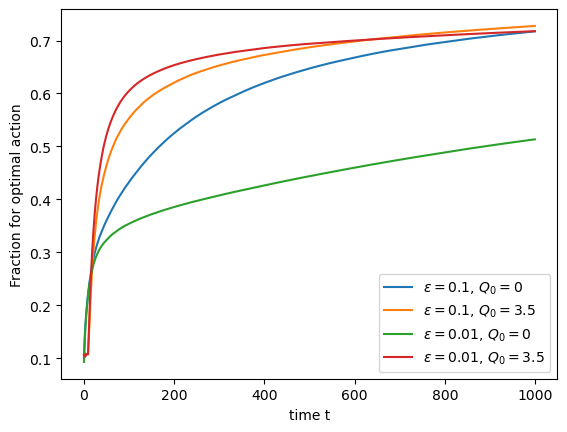

In [9]:
# initialization of Nruns
timesteps = 1000 # for how long the agent must play the bandit
n_runs = 2000
epsilons = [0.1,0.01]
Q_zeros = [0,3.5]
metric_saver_egoiv_vector=[]
for epsilon in epsilons:
    for q_zero in Q_zeros:
        metric_saver_egoiv = np.zeros(timesteps)
        for i in (range(n_runs)):
            # initialization of algorithm (re-extract the bandits every time)
            q_star = np.random.normal(loc = mean, scale = std, size = n_levers) # true value of the means 

            if q_zero == 0:
                Q = np.zeros(n_levers)
            else:
                Q = np.ones(n_levers)*q_zero # optimistic initialization
            N = np.zeros(n_levers)
            
            best_action = np.argmax(q_star)
            actions = np.zeros(timesteps) # save the actions
            # loop
            for t in (range(timesteps)):
                a_idx = epsilon_greedy_algorithm(Q,epsilon)   # pick an action
                N[a_idx] += 1                                   # increase the counter for that action
                R = reward_generator(a_idx,q_star,std)          # generate the reward
                Q = update_Q(Q,N,a_idx,R)                       # update Q
                actions[t] = a_idx
            
            # convert actions array in cumulative times of best action taken
            metric = optimal_action_metric(actions,best_action)
            metric_saver_egoiv = metric_saver_egoiv + (metric - metric_saver_egoiv)/(i+1)
        metric_saver_egoiv_vector.append(metric_saver_egoiv)
            
        plt.plot(np.arange(0,timesteps,1),metric_saver_egoiv, label = f'$\epsilon = {epsilon}$, $Q_0 = {q_zero}$')
#plt.plot(np.arange(0,timesteps,1),metric_saver_g, label = 'greedy')
plt.xlabel('time t')
plt.ylabel('Fraction for optimal action')
plt.legend()
plt.show()

    

# Bayesian K-Armed bandit

In [2]:
def optimal_action_metric(actions, best_action):
    num = np.cumsum(actions == best_action) 
    den = np.arange(1,len(actions)+1,1)
    return num/den

def thompson_sampling(mu_prior, std_prior):
    theta = np.random.normal(mu_prior, std_prior)
    return np.argmax(theta)

def reward_generator(a, q_star, env_std):
    return np.random.normal(q_star[a], env_std)

def update_posterior(mu_prior, std_prior, a, reward, std_like):
    var_prior = std_prior[a]**2
    var_like = std_like**2

    # posterior
    var_post = 1./(1./var_prior + 1./var_like)
    mu_post = var_post*(mu_prior[a]/var_prior+reward/var_like)

    # update
    mu_prior[a] = mu_post
    std_prior[a] = np.sqrt(var_post)

    return mu_prior, std_prior



In [3]:
np.random.seed(3110) # set seed to replicate results
# parameters of our "hidden distribution" of prizes
n_levers = 10

In [7]:
timesteps = 1000
n_runs = 2000

real_mean = 0.0
real_std = 1.0

std_like = 1.0

metric_saver_b = np.zeros(timesteps)

for i in tqdm(range(n_runs)):

    # veri valori delle braccia
    q_star = np.random.normal(real_mean, real_std, size=n_levers)
    best_action = np.argmax(q_star)

    # prior
    Q = np.zeros(n_levers)
    std = np.ones(n_levers) * 10.0

    actions = np.zeros(timesteps)
    for t in range(timesteps):
        a_idx = thompson_sampling(Q, std)
        R = reward_generator(a_idx, q_star, std_like)
        Q, std = update_posterior(Q, std, a_idx, R, std_like)
        actions[t] = a_idx

    metric = optimal_action_metric(actions, best_action)
    metric_saver_b += (metric - metric_saver_b) / (i + 1)
    


100%|███████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:27<00:00, 72.52it/s]


In [13]:
bayesian_regret=regret(np.arange(0,timesteps,1), metric_saver_b,timesteps)

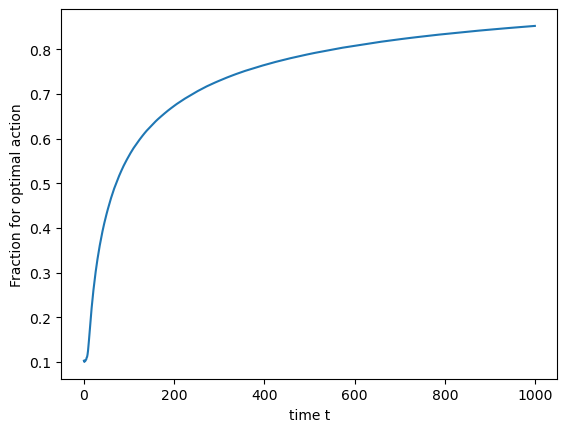

In [15]:
bayesian_regret=regret(np.arange(0,timesteps,1), metric_saver_b,timesteps)
plt.plot(np.arange(0,timesteps,1),metric_saver_b)
plt.xlabel('time t')
plt.ylabel('Fraction for optimal action')
plt.show()


## Variational Inference with Thompson

In [58]:
def vts(n_levers,Ka,timesteps, iterations):   ### ka= # of gaussian component for the distribution of each arm 
    gamma_0 = np.ones(Ka)  # Prior Dirichlet
    u_0 = np.zeros(Ka)  # Prior media
    V_0 = np.ones(Ka) * 10.0  # Prior varianza (scalare)
    alpha_0 = 2.0 * np.ones(Ka)  # Prior Inverse-Gamma shape
    beta_0 = 1.0 * np.ones(Ka)  # Prior Inverse-Gamma scale

    gamma = [gamma_0.copy() for _ in range(n_levers)]  ### vectors to store parameters: shape (Ka*n_levers) 
    alpha = [alpha_0.copy() for _ in range(n_levers)]
    beta = [beta_0.copy() for _ in range(n_levers)]
    u = [u_0.copy() for _ in range(n_levers)]
    V = [V_0.copy() for _ in range(n_levers)]

    D = []  # stores each action and each reward
    Q = np.zeros(timesteps, dtype=int)  ### actions
    R = np.zeros(timesteps)  ### rewards

    for t in tqdm(range(timesteps)):
        mu_a = np.zeros(n_levers)
        
        for lev in range(n_levers):
            ### draw parameters 
            pi = rnd.dirichlet(gamma[lev]) #gamma for dirichlet, weights the components for each lever

            component_rewards = np.zeros(Ka)
            for k in range(Ka):  ### k refers to a single component of the multivariate gaussian (Ka=1 normal gaussian)
                # Campiona la varianza dalla distribuzione Inverse-Gamma
                var_k = 1./rnd.gamma(alpha[lev][k], scale=beta[lev][k])
                
                # Campiona la media dalla distribuzione Normale
                mu_k = rnd.normal(loc=u[lev][k], scale=np.sqrt(var_k * V[lev][k]))
                component_rewards[k] = mu_k
            
            # mean of gaussian mixture   #### Compute μa,t+1 = μa(θa,t+1) formula (18)
            mu_a[lev] = np.sum(pi * component_rewards)

            ##### Thompson sampling

        a_idx=np.argmax(mu_a)
        Q[t]= a_idx
        y_t = np.random.normal(q_star[a_idx], 1.0)   ### reward still gaussian with fixed varian, this could be changed
        R[t] = y_t

        D.append((a_idx, y_t))

        for _ in range(iterations):  # Semplificato: numero fisso di iterazioni
            # Per ogni braccio, calcola le responsabilità e aggiorna i parametri
            for lev in range(n_levers):
                # Filtra le osservazioni per questo braccio
                arm_data = [(i, r) for i, (arm, r) in enumerate(D) if arm == lev]
                
                if not arm_data:
                    continue  # Nessun dato per questo braccio
                
                indices, rewards_a = zip(*arm_data)
                rewards_a = np.array(rewards_a)
                n_samples = len(rewards_a)
                
                # Calcola le responsabilità
                r_ak = np.zeros((n_samples, Ka))
                
                for i in range(n_samples):
                    log_rho = np.zeros(Ka)
                    for k in range(Ka):
                        # Calcola log p(y|z,θ) + E[log p(z|π)]
                        log_rho[k] = -0.5 * (np.log(beta[lev][k]) - digamma(alpha[lev][k])) \
                                    - 0.5 * alpha[lev][k]/beta[lev][k] * ((rewards_a[i] - u[lev][k])**2) \
                                    + digamma(gamma[lev][k]) - digamma(np.sum(gamma[lev]))
                    
                    # Normalizza per ottenere le responsabilità
                    log_rho = log_rho - np.max(log_rho)
                    rho = np.exp(log_rho)
                    r_ak[i] = rho / np.sum(rho)
                    
                    # Aggiorna i parametri variazionali
                for k in range(Ka):
                    # Somma delle responsabilità per questa componente
                    R_ak = np.sum(r_ak[:, k])
                    
                    # Aggiorna gamma
                    gamma[lev][k] = gamma_0[k] + R_ak
                    
                    # Aggiorna V
                    V[lev][k] = 1.0 / (1.0/V_0[k] + R_ak)
                    
                    # Aggiorna u
                    if R_ak > 0:
                        u[lev][k] = V[lev][k] * (u_0[k]/V_0[k] + np.sum(r_ak[:, k] * rewards_a))
                    
                    # Aggiorna alpha
                    alpha[lev][k] = alpha_0[k] + 0.5 * R_ak
                    
                    # Aggiorna beta
                    beta_sum = 0
                    if R_ak > 0:
                        beta_sum = 0.5 * np.sum(r_ak[:, k] * (rewards_a - u[lev][k])**2)
                    
                    beta[lev][k] = beta_0[k] + beta_sum + 0.5 * (u[lev][k] - u_0[k])**2 / V_0[k]
        
    return Q, R
    
                

q_star = np.random.normal(0.0, 1.0, size=n_levers)
best_action = np.argmax(q_star)

def optimal_action_metric(actions, best_action):
    num = np.cumsum(actions == best_action) 
    den = np.arange(1, len(actions)+1, 1)
    return num/den

# Esecuzione dell'algoritmo
n_runs = 10  # Ridotto per velocità
timesteps = 1000
Ka = 2
iterations=5
metric_saver_vts = np.zeros(timesteps)

for i in range(n_runs):
    print(f'run n.{i}')
    actions, rewards = vts(n_levers,Ka,timesteps, iterations)
    metric = optimal_action_metric(actions, best_action)
    metric_saver_vts += (metric - metric_saver_vts) / (i + 1)

run n.0


100%|███████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:56<00:00, 17.74it/s]


run n.1


100%|███████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:51<00:00, 19.48it/s]


run n.2


100%|███████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:52<00:00, 19.03it/s]


run n.3


100%|███████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:56<00:00, 17.83it/s]


run n.4


100%|███████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:57<00:00, 17.26it/s]


run n.5


100%|███████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:03<00:00, 15.66it/s]


run n.6


100%|███████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:39<00:00, 25.63it/s]


run n.7


100%|███████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:34<00:00, 28.86it/s]


run n.8


100%|███████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:33<00:00, 29.55it/s]


run n.9


100%|███████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:34<00:00, 29.35it/s]


In [59]:
vts_regret=regret(np.arange(0,timesteps,1), metric_saver_vts,timesteps)
print(vts_regret)

0.10146420796273128


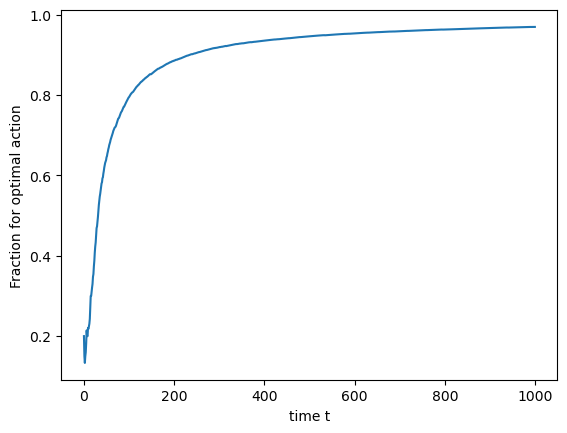

In [60]:
vts_regret=regret(np.arange(0,timesteps,1), metric_saver_vts,timesteps)
plt.plot(np.arange(0,timesteps,1),metric_saver_vts)
plt.xlabel('time t')
plt.ylabel('Fraction for optimal action')
plt.show()


## With ELBO

In [77]:
def vts(n_levers,Ka,timesteps, iterations):   ### ka= # of gaussian component for the distribution of each arm 
    gamma_0 = np.ones(Ka)  # Prior Dirichlet
    u_0 = np.zeros(Ka)  # Prior media
    V_0 = np.ones(Ka) * 10.0  # Prior varianza (scalare)
    alpha_0 = 2.0 * np.ones(Ka)  # Prior Inverse-Gamma shape
    beta_0 = 1.0 * np.ones(Ka)  # Prior Inverse-Gamma scale

    gamma = [gamma_0.copy() for _ in range(n_levers)]  ### vectors to store parameters: shape (Ka*n_levers) 
    alpha = [alpha_0.copy() for _ in range(n_levers)]
    beta = [beta_0.copy() for _ in range(n_levers)]
    u = [u_0.copy() for _ in range(n_levers)]
    V = [V_0.copy() for _ in range(n_levers)]

    D = []  # stores each action and each reward
    Q = np.zeros(timesteps, dtype=int)  ### actions
    R = np.zeros(timesteps)  ### rewards

    for t in tqdm(range(timesteps)):
        mu_a = np.zeros(n_levers)
        
        for lev in range(n_levers):
            ### draw parameters 
            pi = rnd.dirichlet(gamma[lev]) #gamma for dirichlet, weights the components for each lever

            component_rewards = np.zeros(Ka)
            for k in range(Ka):  ### k refers to a single component of the multivariate gaussian (Ka=1 normal gaussian)
                # Campiona la varianza dalla distribuzione Inverse-Gamma
                var_k = 1./rnd.gamma(alpha[lev][k], scale=beta[lev][k])
                
                # Campiona la media dalla distribuzione Normale
                mu_k = rnd.normal(loc=u[lev][k], scale=np.sqrt(var_k * V[lev][k]))
                component_rewards[k] = mu_k
            
            # mean of gaussian mixture   #### Compute μa,t+1 = μa(θa,t+1) formula (18)
            mu_a[lev] = np.sum(pi * component_rewards)

            ##### Thompson sampling

        a_idx=np.argmax(mu_a)
        Q[t]= a_idx
        y_t = np.random.normal(q_star[a_idx], 1.0)   ### reward still gaussian with fixed varian, this could be changed
        R[t] = y_t

        D.append((a_idx, y_t))

        elbo_old = -np.inf
        for iter in range(iterations):
            
            for lev in range(n_levers):
                arm_data = [(i, r) for i, (arm, r) in enumerate(D) if arm == lev]
                
                if not arm_data:
                    continue  # Nessun dato per questo braccio
                
                indices, rewards_a = zip(*arm_data)
                rewards_a = np.array(rewards_a)
                n_samples = len(rewards_a)
                
                r_ak = np.zeros((n_samples, Ka))
                
                for i in range(n_samples):
                    log_rho = np.zeros(Ka)
                    for k in range(Ka):
                        # Calcola log p(y|z,θ) + E[log p(z|π)]
                        log_rho[k] = -0.5 * (np.log(beta[lev][k]) - digamma(alpha[lev][k])) \
                                    - 0.5 * alpha[lev][k]/beta[lev][k] * ((rewards_a[i] - u[lev][k])**2) \
                                    + digamma(gamma[lev][k]) - digamma(np.sum(gamma[lev]))
                    
                    # compute r
                    log_rho = log_rho - np.max(log_rho)
                    rho = np.exp(log_rho)
                    r_ak[i] = rho / np.sum(rho)
                    
                #Update var. parameters
                for k in range(Ka):
                    R_ak = np.sum(r_ak[:, k])
                    
                    gamma[lev][k] = gamma_0[k] + R_ak
                    
                    V[lev][k] = 1.0 / (1.0/V_0[k] + R_ak)
                    
                    if R_ak > 0:
                        u[lev][k] = V[lev][k] * (u_0[k]/V_0[k] + np.sum(r_ak[:, k] * rewards_a))
                    
                    alpha[lev][k] = alpha_0[k] + 0.5 * R_ak
                    
                    beta_sum = 0
                    if R_ak > 0:
                        beta_sum = 0.5 * np.sum(r_ak[:, k] * (rewards_a - u[lev][k])**2)
                    
                    beta[lev][k] = beta_0[k] + beta_sum + 0.5 * (u[lev][k] - u_0[k])**2 / V_0[k]
                    
            elbo_new = calculate_elbo(D, gamma, alpha, beta, u, V, gamma_0, alpha_0, beta_0, u_0, V_0, n_levers, Ka)
            
            if abs(elbo_new - elbo_old) < epsilon:
                break
            
            elbo_old = elbo_new

        
    return Q, R
    
                

q_star = np.random.normal(0.0, 1.0, size=n_levers)
best_action = np.argmax(q_star)

def optimal_action_metric(actions, best_action):
    num = np.cumsum(actions == best_action) 
    den = np.arange(1, len(actions)+1, 1)
    return num/den

# Esecuzione dell'algoritmo
n_runs = 10  # Ridotto per velocità
timesteps = 1000
Ka = 2
iterations=5
metric_saver_elbo = np.zeros(timesteps)
epsilon=0.1
for i in range(n_runs):
    print(f'run n.{i}')
    actions, rewards = vts(n_levers,Ka,timesteps, iterations)
    metric = optimal_action_metric(actions, best_action)
    metric_saver_elbo += (metric - metric_saver_elbo) / (i + 1)

run n.0


100%|███████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:39<00:00, 25.02it/s]


run n.1


100%|███████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:35<00:00, 28.30it/s]


run n.2


100%|███████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:35<00:00, 28.22it/s]


run n.3


100%|███████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:36<00:00, 27.50it/s]


run n.4


100%|███████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:42<00:00, 23.67it/s]


run n.5


100%|███████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:49<00:00, 20.08it/s]


run n.6


100%|███████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:05<00:00, 15.24it/s]


run n.7


100%|███████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:08<00:00, 14.60it/s]


run n.8


100%|███████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:10<00:00, 14.24it/s]


run n.9


100%|███████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:07<00:00, 14.85it/s]


In [78]:
elbo_regret=regret(np.arange(0,timesteps,1), metric_saver_vts,timesteps)
print(elbo_regret)

0.2708570003558409


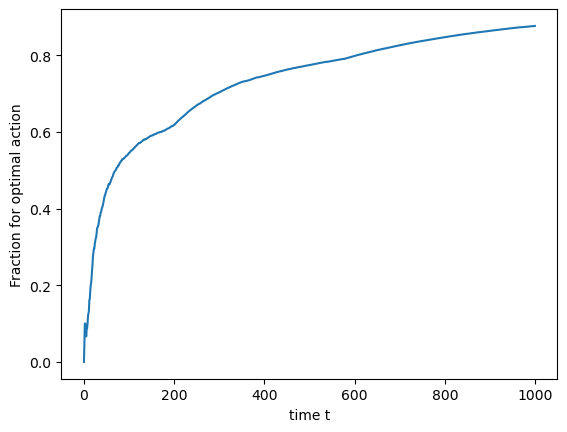

In [79]:
vts_regret=regret(np.arange(0,timesteps,1), metric_saver_vts,timesteps)
plt.plot(np.arange(0,timesteps,1),metric_saver_vts)
plt.xlabel('time t')
plt.ylabel('Fraction for optimal action')
plt.show()


In [75]:
def calculate_elbo(D, gamma_tilde, alpha_tilde, beta_tilde, u_tilde, V_tilde, gamma_a0, alpha_ak0, beta_ak0, u_ak0, V_ak0, n_levers, Ka):
    """
    Calcola l'Evidence Lower BOund (ELBO) per il modello variazionale.
    
    Args:
        D: Lista di tuple (arm, reward)
        gamma_tilde, alpha_tilde, beta_tilde, u_tilde, V_tilde: Parametri variazionali
        gamma_a0, alpha_ak0, beta_ak0, u_ak0, V_ak0: Parametri prior
    
    Returns:
        float: Valore dell'ELBO
    """
   #A = len(gamma_tilde)  # Numero di braccia
   #Ka = len(gamma_tilde[0])  # Numero di componenti per braccio
    
    # Inizializza ELBO
    elbo = 0.0
    
    # Per ogni braccio
    for a in range(n_levers):
        # Filtra le osservazioni per questo braccio
        arm_data = [(i, r) for i, (arm, r) in enumerate(D) if arm == a]
        
        if not arm_data:
            continue  # Nessun dato per questo braccio
        
        _, rewards_a = zip(*arm_data)
        rewards_a = np.array(rewards_a)
        n_samples = len(rewards_a)
        
        # Calcola le responsabilità (necessarie per l'ELBO)
        r_ak = np.zeros((n_samples, Ka))
        
        for i in range(n_samples):
            log_rho = np.zeros(Ka)
            for k in range(Ka):
                log_rho[k] = -0.5 * (np.log(beta_tilde[a][k]) - digamma(alpha_tilde[a][k])) \
                           - 0.5 * alpha_tilde[a][k]/beta_tilde[a][k] * ((rewards_a[i] - u_tilde[a][k])**2) \
                           + digamma(gamma_tilde[a][k]) - digamma(np.sum(gamma_tilde[a]))
            
            log_rho = log_rho - np.max(log_rho)
            rho = np.exp(log_rho)
            r_ak[i] = rho / np.sum(rho)
        
        # 1. Expected log-likelihood
        for i in range(n_samples):
            for k in range(Ka):
                # E[log p(y|z,θ)]
                expected_log_like = -0.5 * np.log(2 * np.pi) \
                                  - 0.5 * (digamma(alpha_tilde[a][k]) - np.log(beta_tilde[a][k])) \
                                  - 0.5 * (alpha_tilde[a][k] / beta_tilde[a][k]) * ((rewards_a[i] - u_tilde[a][k])**2)
                
                elbo += r_ak[i, k] * expected_log_like
        
        # 2. Expected log-prior
        # 2.1 Prior per i pesi della mixture (Dirichlet)
        elbo += (np.sum((gamma_a0 - 1) * (digamma(gamma_tilde[a]) - digamma(np.sum(gamma_tilde[a])))))
        
        # 2.2 Prior per le varianze (Inverse-Gamma)
        for k in range(Ka):
            elbo += alpha_ak0[k] * np.log(beta_ak0[k]) - loggamma(alpha_ak0[k]) \
                  - (alpha_ak0[k] + 1) * (digamma(alpha_tilde[a][k]) - np.log(beta_tilde[a][k])) \
                  - beta_ak0[k] * (alpha_tilde[a][k] / beta_tilde[a][k])
        
        # 2.3 Prior per le medie (Normal)
        for k in range(Ka):
            elbo += -0.5 * np.log(2 * np.pi * V_ak0[k]) \
                  - 0.5 * (1/V_ak0[k]) * (u_tilde[a][k] - u_ak0[k])**2 \
                  - 0.5 * (alpha_tilde[a][k] / beta_tilde[a][k]) * V_tilde[a][k]
        
        # 3. Entropy della distribuzione variazionale
        # 3.1 Entropy della Dirichlet
        elbo += loggamma(np.sum(gamma_tilde[a])) - np.sum(loggamma(gamma_tilde[a])) \
              + np.sum((gamma_tilde[a] - 1) * (digamma(gamma_tilde[a]) - digamma(np.sum(gamma_tilde[a]))))
        
        # 3.2 Entropy della Inverse-Gamma
        for k in range(Ka):
            elbo += alpha_tilde[a][k] + np.log(beta_tilde[a][k]) + loggamma(alpha_tilde[a][k]) \
                  - (1 + alpha_tilde[a][k]) * digamma(alpha_tilde[a][k])
        
        # 3.3 Entropy della Normal
        for k in range(Ka):
            elbo += 0.5 * (1 + np.log(2 * np.pi * V_tilde[a][k]))
        
        # 3.4 Entropy della Categorical (responsabilità)
        for i in range(n_samples):
            mask = r_ak[i] > 0  # Evita log(0)
            elbo -= np.sum(r_ak[i, mask] * np.log(r_ak[i, mask]))
    
    return elbo

# Regrets

In [16]:
eg_regret=[regret(np.arange(0,timesteps,1), metric_saver_eg_vector[i],timesteps) for i in range(len(metric_saver_eg_vector))]
egoiv_regret=[regret(np.arange(0,timesteps,1), metric_saver_egoiv_vector[i],timesteps) for i in range(len(metric_saver_egoiv_vector))]
thompson_regret=regret(np.arange(0,timesteps,1), metric_saver_b,timesteps)
greedy_regret=regret(np.arange(0,timesteps,1), metric_saver_fp,timesteps)
silly_regret=regret(np.arange(0,timesteps,1), metric_saver_g,timesteps)

In [28]:
print(f'Greedy: {greedy_regret} \n'
      f'Silly: {silly_regret} \n'
      f'ε-greedy: {eg_regret} \n'
      f'Optimistic Intial Values: {egoiv_regret} \n'
      f'Thompson: {thompson_regret}')


Greedy: 0.3639610605978919 
Silly: 0.6585216359813874 
ε-greedy: [0.4145927816940567, 0.564255433659547] 
Optimistic Intial Values: [0.3948977541780831, 0.34712362406602393, 0.567567775846217, 0.33474211376095536] 
Bayesian: 0.26297252647444497
